In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
KS_loss = pd.read_excel(r'KS_loss_merged.xlsx')
KS_loss.head()

,State,State name,County,County name,Year,Month,Commodity (partial list),Cause of loss,Payment indemnity (US$),Payment acreage,Payment count,Liability (US$),Subsidy (US$),Avg_Temp,Min_Temp,Max_Temp,Precipitation,PDSI
0,20,Kansas,67,Grant,1989,0,Wheat,Freeze,334.0,16.2000,2,1125.0,18.0,NaN,NaN,NaN,NaN,NaN
1,20,Kansas,67,Grant,1989,1,Wheat,Drought,1413.0,67.6338,1,2842.0,203.0,35.3,18.2,52.4,0.41,-2.70
2,20,Kansas,67,Grant,1989,1,Wheat,Wind/excess Wind,18073.0,259.6120,1,18159.0,605.0,35.3,18.2,52.4,0.41,-2.70
3,20,Kansas,67,Grant,1989,2,Wheat,Cold Winter,31289.0,1036.5716,2,61478.0,2648.0,26.7,14.8,38.6,0.40,-2.86
4,20,Kansas,67,Grant,1989,2,Wheat,Drought,4156.0,269.2672,2,12663.0,746.0,26.7,14.8,38.6,0.40,-2.86


In [64]:
avg_temp_data = KS_loss['Avg_Temp']
trial = avg_temp_data.head(10)
trial

0     NaN
1    35.3
2    35.3
3    26.7
4    26.7
5    26.7
6    45.4
7    45.4
8    45.4
9    56.9
Name: Avg_Temp, dtype: float64

45.4    3
26.7    3
35.3    2
56.9    1
Name: Avg_Temp, dtype: int64


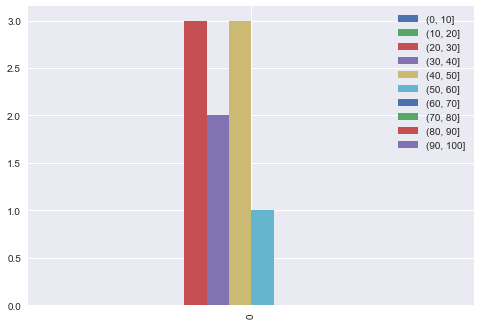

In [67]:
#trial.apply(pd.Series.value_counts, bins=[0,10,20,30,40,50,60,70,80,90,100])
print(trial.value_counts())
trial.apply(lambda x: pd.cut(trial, bins=[0,10,20,30,40,50,60,70,80,90,100]).value_counts(sort=False)).iloc[[0]].plot.bar()
plt.show()
#trial.groupby(pd.cut(trial['x'], np.arange(0,100,20))).count()

### Frequency Bar Graph (Average Temp)

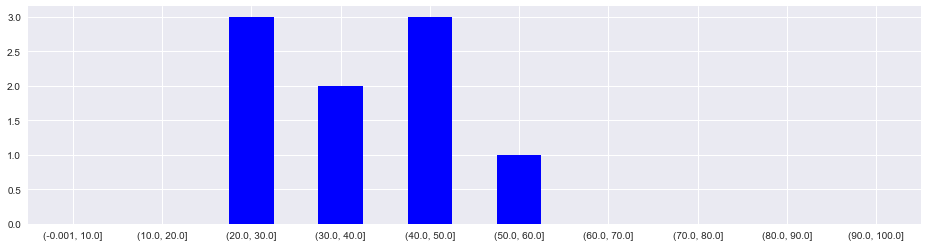

In [88]:
out = pd.cut(trial, bins=[0,10,20,30,40,50,60,70,80,90,100], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(16,4))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
#ax.set_xticklabels([t if not i%2 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

In [ ]:
# Exploding nested pie chart

explode = [0.2*i for i in len(sizes)*[1]] 
explode_types = [0.1*i for i in len(sizes_types)*[1]] 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=90, frame=True, textprops={'fontsize': 7})
plt.pie(sizes_types, explode=explode_types, labels=labels_types, colors=colors_types, radius=0.75, startangle=90, textprops={'color':'white', 'fontsize':6})
centre_circle = plt.Circle((0,0), 0.5, color='black', fc='white', linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.rcParams['patch.linewidth'] = 0.25
plt.axis('equal')
plt.title('Causes of Loss')
plt.tight_layout()
plt.show()